In [1]:
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.5


## Projeto 2: Desenvolvimento de um Modelo de Recuperação de Dívidas (Classificação Binária)

Modelo Escolhido: Random Forest

O Random Forest foi escolhido devido à sua capacidade de lidar com conjuntos de dados complexos, como os dados de recuperação de dívidas, que geralmente possuem múltiplas variáveis e relações não-lineares. Além disso, o Random Forest é robusto em lidar com dados desbalanceados, o que é comum nesse tipo de problema.

https://ebaconline.com.br/blog/random-forest-seo

In [2]:
# Importação e configuração
import pandas as pd
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTE # Para utilizar o imblearn o scikit-learn precisa estar na versão 1.2.2

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

pd.options.display.float_format = '{:.2f}'.format


C:\Users\carlosaugusto.silva\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Carregando o Conjunto de dados

In [3]:
# Carregando arquivo Csv
df = pd.read_csv('base_case.csv', sep='\t')

# Avaliando o conjunto de dados de forma macro

In [4]:
# Verificando quantidade de linhas e colunas
df.shape

(46522, 203)

In [5]:
# Visualizar os Primeiros Registros
df.sample(5)

,index,alvo,REF_DATE,PRODUTO,DIAS_ATRASO,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,col_140,col_141,col_142,col_143,col_144,col_145,col_146,col_147,col_148,col_149,col_150,col_151,col_152,col_153,col_154,col_155,col_156,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,col_166,col_167,col_168,col_169,col_170,col_171,col_172,col_173,col_174,col_175,col_176,col_177,col_178,col_179,col_180,col_181,col_182,col_183,col_184,col_185,col_186,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,col_200,REGIAO
34960,34960,0,2023-10-31,CREDITO PESSOAL,47,4609.70,30 a 60,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,4,2.00,2.00,3.00,4.00,0.00,0.00,0.00,0.00,1.00,1.00,2.00,3.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,C,C,D,E,A,A,B,C,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,7,18.78,2.18,13.19,2.18,18.78,6.82,3.70,12.00,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,5,2,0,0,9,5,2,0,0,9,6,3,0,0,11,0.00,0.80,0.00,0.44,0.00,SEM PASSAGEM,ALTA,SEM APROVACAO,BAIXA,SEM APROVACAO,S,N,9.88,NaN,S,N,FINANCEIRAS,S,7.36,N,FINANCEIRAS-VAREJO,N,NaN,N,APROV:S - NOVASOLIC:S - SOLICMESMOLOCAL:N,APROV:N - NOVASOLIC:N - SOLICMESMOLOCAL:N,0,0,1,0.00,2 A 4 SM,0.00,0,SUPERIOR COMPLETO,ALTO,1,1.00,0,0,1,E,0,OK,ENGENHEIRO,0,1,DE 40 A 59 ANOS,X,NaN,0,0,0,0,0,0,5,B,ALTO,B,3.00,2.00,0.00,URBANO,CENTRO-OESTE
12279,12279,0,2022-12-29,CREDITO PESSOAL,34,31009.49,30 a 60,2,0,0,0,0,0,0,0,0,2,0,0,0,0,4,0,0,0,2,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,4.00,8.00,8.00,8.00,2.00,5.00,5.00,5.00,2.00,3.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,4.00,6.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,E,I,I,I,A,E,G,K,1,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,10,60.28,0.29,60.28,0.29,32.56,4.92,6.70,1.60,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,7,2,0,0,12,7,6,0,0,16,7,6,0,0,16,0.00,1.00,NaN,0.35,0.44,SEM APROVACAO,ALTA,SEM PASSAGEM,BAIXA,BAIXA,S,S,1.66,4.92,S,S,FINANCEIRAS,S,0.45,N,FINANCEIRAS-BANCOS,N,8.33,N,APROV:S - NOVASOLIC:S - SOLICMESMOLOCAL:N,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N,1,0,0,0.00,2 A 4 SM,0.00,0,SUPERIOR COMPLETO,ALTO,1,2.00,0,0,1,D,0,NaN,NaN,0,0,DE 25 A 39 ANOS,Y,NaN,0,0,0,1,0,0,5,C,ALTO,C,5.00,-1.00,0.00,URBANO,SUDESTE
11716,11716,0,2023-01-31,CREDITO PESSOAL,52,3744.46,30 a 60,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,10.00,15.00,21.00,25.00,0.00,0.00,0.00,0.00,0.00,5.00,6.00,6.00,10.00,10.00,15.00,19.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,K,K,K,K,A,A,A,A,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,4,87.11,2.45,87.11,2.45,NaN,NaN,3.00,NaN,INDEFINIDO,INDEFINIDO,INDEFINIDO,NaN,NaN,NaN,3,0,0,0,5,4,0,0,0,6,5,0,0,0,7,NaN,0.47,0.77,0.70,NaN,SEM PASSAGEM,BAIXA,ALTA,MEDIA,SEM PASSAGEM,S,N,2.53,NaN,S,N,VAREJO,S,0.08,S,VAREJO-VAREJO,N,NaN,N,APROV:S - NOVASOLIC:S - SOLICMESMOLOCAL:S,APROV:N - NOVASOLIC:N - SOLICMESMOLOCAL:N,1,0,0,0.00,2 A 4 SM,0.00,0,SUPERIOR COMPLETO,ALTO,

In [6]:
# Resumo Estatístico dos Dados
df.describe()

,index,alvo,DIAS_ATRASO,col_4,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115,col_116,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,col_140,col_141,col_142,col_150,col_151,col_156,col_160,col_164,col_165,col_166,col_167,col_169,col_170,col_173,col_174,col_175,col_176,col_177,col_179,col_182,col_183,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_197,col_198,col_199
count,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,42989.00,42989.00,41712.00,41712.00,14311.00,14311.00,37003.00,11520.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,20881.00,22587.00,18812.00,34945.00,10828.00,30530.00,11692.00,19311.00,3302.00,46522.00,46522.00,46522.00,45979.00,40402.00,46522.00,46522.00,45979.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,42393.00,42374.00,43038.00
mean,23260.50,0.13,45.23,5705.32,0.27,0.00,0.00,0.00,0.02,0.14,0.00,0.00,0.17,0.60,0.01,0.00,0.00,0.03,0.27,0.00,0.00,0.30,1.10,0.01,0.00,0.00,0.06,0.53,0.00,0.00,0.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,1.20,2.21,0.87,2.01,4.35,7.69,0.29,0.63,1.31,2.59,0.18,0.51,1.26,2.16,0.40,0.87,1.77,2.94,0.23,0.47,1.02,2.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.27,0.52,0.74,0.00,0.19,0.41,0.01,0.34,0.02,0.00,0.01,0.02,0.73,0.00,0.27,0.01,0.00,0.00,0.01,0.17,0.72,4.43,46.18,8.67,43.58,10.25,36.27,14.15,7.28,5.28,2.64,0.68,0.01,0.03,5.04,3.09,0.81,0.01,0.03,5.64,3.80,1.07,0.01,0.04,6.65,0.20,0.59,0.62,0.49,0.64,10.13,14.87,3.57,8.01,0.32,0.00,0.04,0.07,0.26,0.17,0.22,0.75,0.12,0.00,0.54,0.07,0.00,0.02,0.41,0.09,0.04,0.19,0.00,0.00,2.43,2.94,-0.80,0.69
std,13429.89,0.33,8.36,14505.09,0.62,0.06,0.00,0.01,0.13,0.60,0.00,0.03,0.51,0.97,0.09,0.00,0.01,0.18,0.82,0.00,0.04,0.69,1.31,0.11,0.01,0.05,0.23,1.23,0.01,0.05,0.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.14,1.67,2.35,2.99,4.97,8.62,13.94,1.52,2.14,3.47,6.58,0.66,1.28,2.39,3.33,2.29,3.80,6.47,10.08,1.05,1.65,2.79,5.46,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.07,0.44,0.50,0.44,0.00,0.39,0.49,0.11,0.47,0.14,0.00,0.11,0.14,0.45,0.06,0.44,0.08,0.00,0.00,0.08,0.38,0.45,2.75,24.28,11.69,24.82,13.24,20.63,15.26,9.55,6.62,2.15,1.24,0.08,0.17,3.36,2.60,1.49,0.08,0.18,3.90,3.17,1.95,0.09,0.20,4.66,0.34,0.43,0.39,0.38,0.37,1

In [7]:
# Verificar o tipo de dados de cada variável
df.dtypes

index            int64
alvo             int64
REF_DATE        object
PRODUTO         object
DIAS_ATRASO      int64
                ...   
col_197        float64
col_198        float64
col_199        float64
col_200         object
REGIAO          object
Length: 203, dtype: object

In [8]:
# Verificando quantidade de cada tipo dentro do dataframe 
df.dtypes.value_counts()

int64      103
float64     52
object      48
Name: count, dtype: int64

In [9]:
# Verificando informações do arquivo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46522 entries, 0 to 46521
Columns: 203 entries, index to REGIAO
dtypes: float64(52), int64(103), object(48)
memory usage: 72.1+ MB


<Axes: xlabel='alvo'>

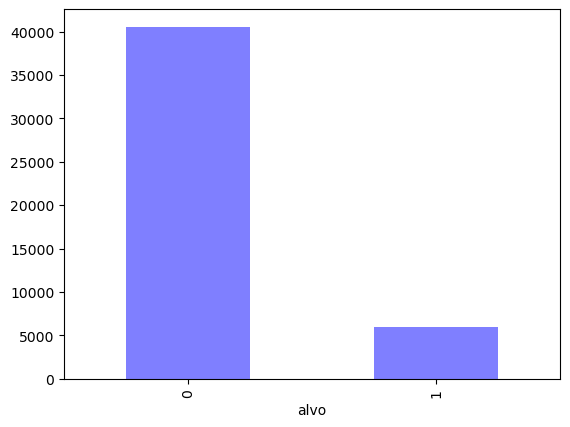

In [10]:
df['alvo'].value_counts().plot(kind='bar', color='blue', alpha=0.5)

# Pré-Processamento pt.1

#### Passos que foram seguidos:
- Agrupamento de dados
- Remoção
- Binarização de dados
- Padronização

In [11]:
# Mapeamento para criar a nova coluna 'alvo_label'
mapeamento_descricao = {1: 'Mau Pagador', 0: 'Bom Pagador'}

# Aplicando o mapeamento para criar a nova coluna 'alvo_label'
df['alvo_label'] = df['alvo'].map(mapeamento_descricao)

In [12]:
# Verificando a presença de dados nulos
df.isnull().sum()

index             0
alvo              0
REF_DATE          0
PRODUTO           0
DIAS_ATRASO       0
               ... 
col_198        4148
col_199        3484
col_200        4859
REGIAO         4653
alvo_label        0
Length: 204, dtype: int64

In [13]:
# Lista de colunas que irão ser dividas
columns = ['col_162', 'col_163']
suffixes = {'col_162': '', 'col_163': '_1'}

# Para cada coluna selecionada o codigo vai executar o loop
for column in columns:
    # Separando a coluna com chave e valor
    split_data = df[column].str.split(' - ')
    
    # Definição das novas colunas
    aprov = []
    novasolic = []
    solicmesmolocal = []
    
    # Interando os valores em suas respectivas colunas 
    for row in split_data:
        for item in row:
            key, value = item.split(':')
            if key == 'APROV':
                aprov.append(value)
            elif key == 'NOVASOLIC':
                novasolic.append(value)
            elif key == 'SOLICMESMOLOCAL':
                solicmesmolocal.append(value)
    
    # Criando novo dataframe com os dados extraidos do loop
    new_df = pd.DataFrame({'APROV' + suffixes[column]: aprov, 
                               'NOVASOLIC' + suffixes[column]: novasolic, 
                               'SOLICMESMOLOCAL' + suffixes[column]: solicmesmolocal})
            
    # Concatenando os novos dados  
    df = pd.concat([df, new_df], axis=1)

# Removendo as colunas com dados aglutinados
df.drop(columns=columns, inplace=True)

In [14]:
# Removendo colunas que só tem um valor unico
for column in df.columns.tolist():
    unique_count = df[column].nunique()
    if unique_count == 1:
        df = df.drop(columns=column)

In [15]:
# Agrupamentos junto com as instruções do proximo passo a ser feito com os dados

cols_clear_obj = [] # Prontos para fazer OHE 
cols_not_clear_obj = [] # Tratar para poder fazer o OHE

cols_clear_float = [] # Prontos para o modelo
cols_not_clear_float = [] # Tratar para o modelo

cols_clear_int = [] # Prontos para o modelo
cols_not_clear_int = []  # Tratar para o modelo

cols_to_remove = []  # Dados que nao vai afetar siginifcativamente o mdoelo
cols_bin = []

for col in df.columns:
   
    null_count = df[col].isnull().sum()
    
    # Agrupando dados com mais de 50% de dados nulos
    if (df[col].isnull().sum() / df.shape[0]) * 100 > 50:
        cols_to_remove.append(col)
        continue
        
    # Agrupando dados limpos binarios
    if df[col].nunique() == 2 and df[col].dtype == 'O':
        cols_bin.append(col)
        
    # Agrupando dados limpos que são do tipo objeto
    if null_count == 0 and df[col].dtype == 'object':
        cols_clear_obj.append(col)

    # Agrupando dados sujos do tipo objeto
    elif null_count > 0 and df[col].dtype == 'object':
        cols_not_clear_obj.append(col)
        
    # Agrupando dados limpos que são do tipo float64
    if null_count == 0 and df[col].dtype == 'float64':
        cols_clear_float.append(col)
    # Agrupando dados sujos do tipo float64
    elif null_count > 0 and df[col].dtype == 'float64':
        cols_not_clear_float.append(col)
        
    # Agrupando dados limpos que são do tipo int64
    if null_count == 0 and df[col].dtype == 'int64':
        cols_clear_int.append(col)
    # Agrupando dados sujos do tipo int64
    elif null_count > 0 and df[col].dtype == 'int64':
        cols_not_clear_int.append(col)

In [16]:
# Mapeamento para binarizar 'S' como 1 e 'N' como 0
mapeamento_binarizacao = {'S': 1, 'N': 0}
cols_bin.remove('alvo_label')
# Aplicando a binarização às colunas
for col in cols_bin:
        df[col] = df[col].map(mapeamento_binarizacao)

#### Removendo Colunas

- Colunas que tem mais de 50% de dados ausentes
- removendo colunas com valor unico

In [17]:
# Remoção de dados que tem mais de 27 mil de vazios (aproximadamente 50% de dados nulos)
df = df.drop(columns=cols_to_remove)

In [18]:
# Preenchendo valores nulos em colunas do tipo objeto com 'INDEFINIDO'
df[cols_not_clear_obj] = df[cols_not_clear_obj].fillna('INDEFINIDO')

# Preenchendo valores nulos em colunas do tipo int64 com a média
for col in cols_not_clear_int:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)

# Preenchendo valores nulos em colunas do tipo float64 com a média
for col in cols_not_clear_float:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)

# Analise Exploratoria
Agora com dados limpos iremos comparar e conhecer melhor os dados.

Diferente da analise em macro, aqui irei criar graficos e trazer dados mais especificos.

#### Title

In [19]:
df.head()

,index,alvo,REF_DATE,DIAS_ATRASO,col_4,col_6,col_7,col_9,col_10,col_11,col_13,col_14,col_15,col_16,col_18,col_19,col_20,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_91,col_92,col_93,col_94,col_95,col_97,col_98,col_99,col_100,col_101,col_102,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_115,col_117,col_118,col_119,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_141,col_143,col_144,col_145,col_146,col_147,col_148,col_149,col_150,col_152,col_153,col_154,col_155,col_157,col_159,col_161,col_164,col_165,col_166,col_167,col_168,col_169,col_170,col_171,col_172,col_173,col_174,col_175,col_176,col_177,col_178,col_179,col_182,col_183,col_184,col_185,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,col_200,REGIAO,alvo_label,APROV,NOVASOLIC,SOLICMESMOLOCAL,APROV_1,NOVASOLIC_1,SOLICMESMOLOCAL_1
0,0,0,2023-01-31,52,2461.11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2,0.00,0.00,2.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,A,A,C,C,A,A,A,A,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,7,44.65,7.65,44.65,7.65,18.50,INDEFINIDO,INDEFINIDO,INDEFINIDO,4,0,0,0,7,4,0,0,0,7,6,0,0,0,9,0.00,SEM APROVACAO,SEM PASSAGEM,SEM APROVACAO,SEM APROVACAO,SEM PASSAGEM,1,0,44.65,0,0,VAREJO,1,0,0,0,0,0,0,0.00,SEM INFORMACAO,0.00,0,FUNDAMENTAL COMPLETO,BASICO,0,1.00,0,0,1,E,0,0,0,DE 25 A 39 ANOS,Y,0,0,0,0,0,0,2,INDEFINIDO,MEDIO,INDEFINIDO,3.00,-1.00,1.00,URBANO,NORTE,Bom Pagador,1,1,0,0,0,0
1,1,0,2022-12-29,37,4674.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,0.00,A,A,A,C,A,A,A,C,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,7,41.61,15.47,41.61,15.47,6.50,INDEFINIDO,INDEFINIDO,INDEFINIDO,3,2,0,0,7,3,2,0,0,7,3,2,0,0,7,0.67,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,1,1,15.47,0,0,VAREJO,0,0,0,0,0,0,0,0.00,2 A 4 SM,1.00,1,SUPERIOR INCOMPLETO,MEDIO,0,1.00,0,0,1,D,0,0,0,DE 25 A 39 ANOS,Y,0,1,0,0,0,0,4,D,MEDIO,D,2.00,1.00,1.00,URBANO,NORDESTE,Bom Pagador,1,0,0,1,0,0
2,2,0,2023-09-29,36,43649.17,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,B,B,B,B,A,A,A,A,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,5,69.55,0.82,69.55,0.82,4.00,INDEFINIDO,INDEFINIDO,INDEFINIDO,2,2,0,0,6,2,2,0,0,6,2,2,0,0,6,1.00,ALTA,SEM PASSAGEM,SEM PASSAGEM,ALTA,SEM PASSAGEM,1,1,0.82,1,0,BANCOS,0,0,0,0,1,0,0,0.00,4 A 10 SM,1.00,1,SUPERIOR COMPLETO,ALTO,1,4.00,1,0,1,D,0,0,0,DE 40 A 59 ANOS,X,0,0,1,1,0,0,8,B,MUITO ALTO,B+,4.00,3.00,1.00,URBANO,SUDESTE,Bom Pagador,1,0,0,1,0,0
3,3,1,2023-02-28,48,1090.58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,A,A,A,B,A,A,B,B,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3,12.65,12.65,12.65,12.65,7.28,INDEFINIDO,INDEFINIDO,INDEFINIDO,1,0,0,0,3,1,0,0,0,3,1,1,0,0,4,0.75,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,1,0,12.66,0,0,FINANCEIRAS,0,0,0,0,0,0,0,0.00,INDEFINIDO,0.00,0,INDEFINIDO,INDEFINIDO,0,0.00,0,0,0,E,0,0,0,DE 40 A 59 ANOS,X,1,0,0,1,0,0,1,C,BAIXO,C-,4.00,-4.00,0.00,URBANO,SUDESTE,Mau Pagador,1,0,0,0,0,0
4,4,0,2023-02-28,34,1495.49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,A,A,B,B,A,A,A,A,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,28.62,9.04,28.62,9.04,19.60,INDEFINIDO,INDEFINIDO,INDEFINIDO,0,0,0,0,2,0,0,0,0,2,1,0,0,0,3,1.0

In [20]:
def plot_payers(df, col_cat, col_alvo):
    # Contar bons e maus pagadores
    total_count = df.groupby([col_cat, col_alvo]).size().unstack(fill_value=0).reset_index()
    
    # Renomear as colunas
    total_count.columns = [col_cat, 'Quantidade de Bons Pagadores', 'Quantidade de Maus Pagadores']
    
    # Configuração do gráfico
    bar_width = 0.35
    index = np.arange(len(total_count))
    
    # Plot
    plt.figure(figsize=(12, 7))
    bar1 = plt.bar(index, total_count['Quantidade de Bons Pagadores'], bar_width, label='Bons Pagadores', color='b')
    bar2 = plt.bar(index + bar_width, total_count['Quantidade de Maus Pagadores'], bar_width, label='Maus Pagadores', color='r')
    
    plt.xlabel(col_cat)
    plt.ylabel('Quantidade')
    plt.title(f'Quantidade de Bons e Maus Pagadores por {col_cat}')
    plt.xticks(index + bar_width / 2, total_count[col_cat])
    plt.legend()
    
    plt.grid(axis='y')  # Adiciona uma grade apenas no eixo y
    plt.show()

## Quantidade de bons e maus pagadores na coluna 'col_154'

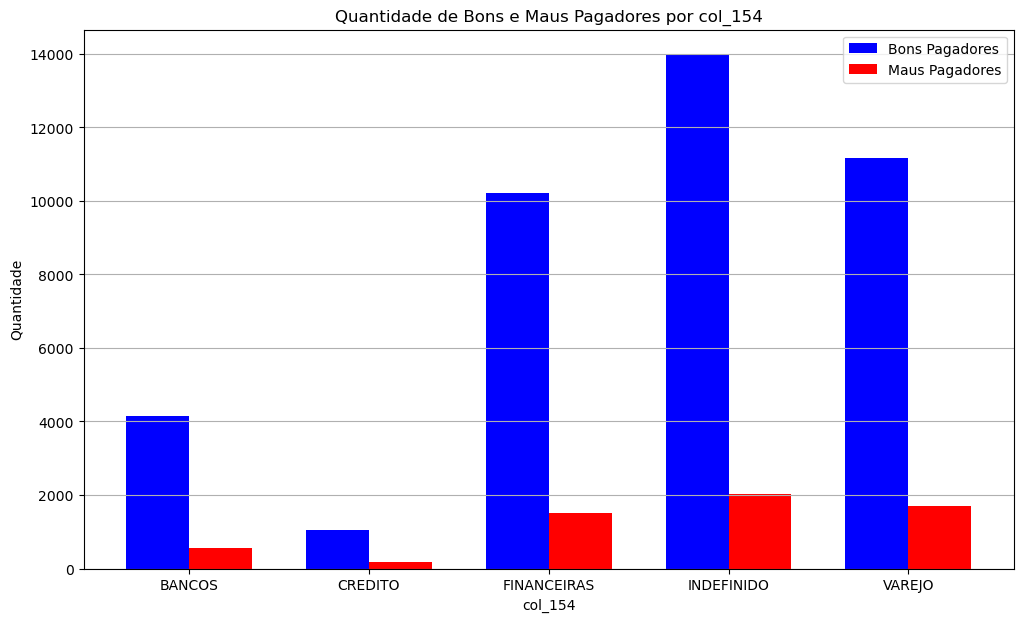

In [21]:
plot_payers(df, 'col_154', 'alvo')

## Quantidade de bons e maus pagadores na coluna 'REGIAO'

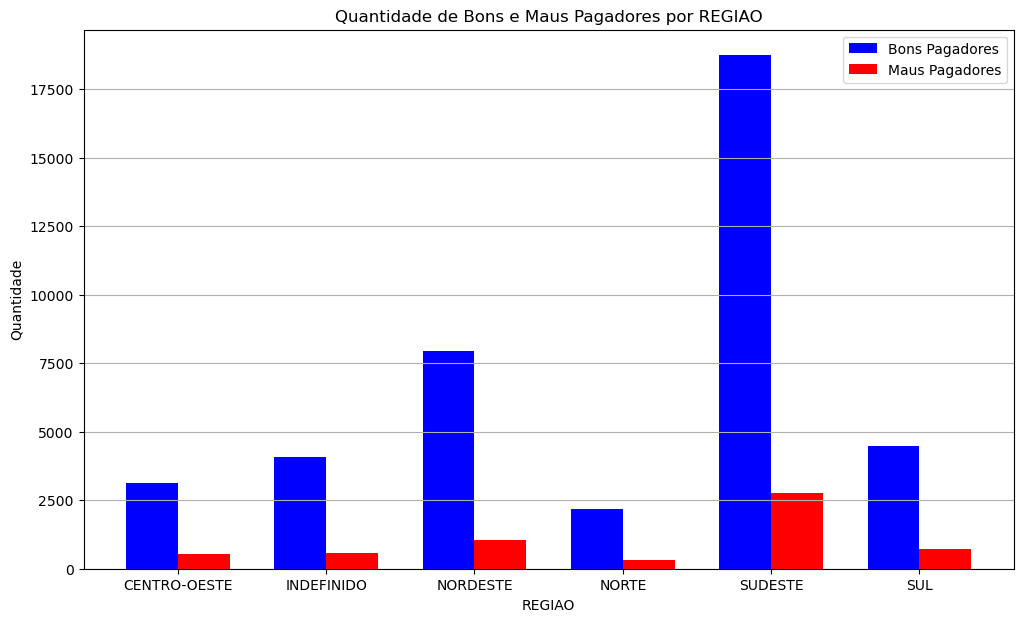

In [22]:
plot_payers(df, 'REGIAO', 'alvo')

#### Visualização de frequência de bom e mal pagador ao longo do tempo
Como vi limitações no meu modelo em relação ao uso de data para fazer as previsões, achei justo mostrar uma visualização da serie historica da frequencia do bom e mal pagador.

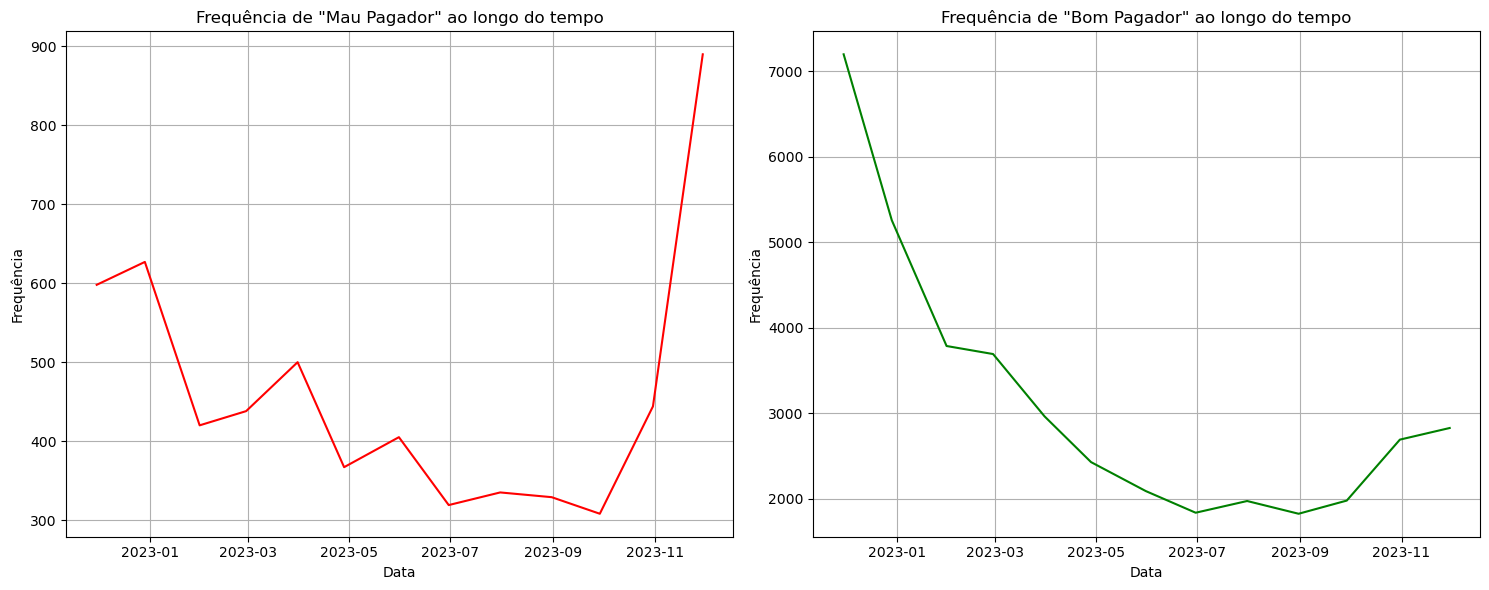

In [23]:
import matplotlib.pyplot as plt

# Convertendo a coluna 'REF_DATE' para o formato de data
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])

# Agrupando os dados por 'REF_DATE' e contando a frequência de 'Mau Pagador' e 'Bom Pagador'
frequencia_mau_pagador = df[df['alvo_label'] == 'Mau Pagador'].groupby('REF_DATE').size()
frequencia_bom_pagador = df[df['alvo_label'] == 'Bom Pagador'].groupby('REF_DATE').size()

# Criando uma figura com dois subgráficos (lado a lado)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Gráfico de "Mau Pagador"
axes[0].plot(frequencia_mau_pagador, color='red')
axes[0].set_title('Frequência de "Mau Pagador" ao longo do tempo')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Frequência')
axes[0].grid(True)

# Gráfico de "Bom Pagador"
axes[1].plot(frequencia_bom_pagador, color='green')
axes[1].set_title('Frequência de "Bom Pagador" ao longo do tempo')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Frequência')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [24]:
# Removendo 'alvo_label' que serviu apenas para criar uma descrição e 'REF_DATE' que foi utilizado para visualizar a Serie Historica
df = df.drop(columns=['REF_DATE','alvo_label'])

# Pré-Processamento pt.2

#### Passos que foram seguidos:
- Correlação com V de Cramer
- Remoção de dados com alta correlação
- One-Hot-Encoder para os dados categoricos do tipo Object
- Separação dos dados de treino e teste

## Correlação com V de Cramer

Ao explorar a relação entre variáveis categóricas, é essencial complementar análises visuais com métodos estatísticos. A medida de associação, especialmente entre variáveis nominais ou ordinais, pode ser avaliada de diversas maneiras. Uma abordagem comum é o uso do coeficiente V de Cramer, que varia de 0 a 1 e indica a intensidade da associação da seguinte forma:

- **V > 0.7**: associação alta
- **0.7 ⩾ V > 0.3**: associação moderada
- **0.3 ⩾ V > 0.1**: associação baixa
- **0.1 ⩾ V > 0**: associação nula

O coeficiente V de Cramer é calculado pela fórmula:

$ V = \sqrt{\frac{\chi^{2}/n}{min(k-1,r-1)}} $$

Onde:

- \(\chi^2\): estatística qui-quadrado relacionada à tabela de contingência
- \(n\): soma de todas as células da tabela de contingência
- \(k\): número de colunas na tabela de contingência
- \(r\): número de linhas na tabela de contingência

Para calcular o V de Cramer, podemos utilizar a função chi2_contingency do módulo stats.


fonte: https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V

In [25]:
from scipy import stats

# Função que tras o valor da correlação de dados categoricos

def vcramer(data):
  #Chi-squared test statistic, sample size, and minimum of rows and columns
  X2 = stats.chi2_contingency(data, correction=False)[0]
  n = np.sum(data)
  minDim = min(data.shape)-1
  
  #calculate Cramer's V 
  V = np.sqrt((X2/n) / minDim)

  return V

#### Identificação de Variáveis Categóricas

Não tendo muitas informações sobre o dataframe, foi considerada a seguinte questão: para identificar os dados categóricos, foi feita uma análise e percebeu-se que existem várias colunas categóricas com muitas categorias diferentes. Portanto, foi estabelecido um limiar de 50 itens. Com um conhecimento mais detalhado dos dados ou com alguém que pudesse explicar o significado exato de cada coluna, o modelo teria um desempenho melhor.


In [26]:
drop_to_v_cramer = ['DIAS_ATRASO']
for c in df.columns.tolist():
    count = df[c].nunique()
    # Verifica se a coluna não é categórica e adiciona se tiver mais de 50 valores únicos
    if df[c].dtype != 'O' and count > 50:
        drop_to_v_cramer.append(c)

df_cramer = df.drop(columns=drop_to_v_cramer)

In [27]:
# Visualizando dados do DataFrame apenas com dados possivelmente categoricos
df_cramer.head()

,alvo,col_6,col_7,col_9,col_10,col_11,col_13,col_14,col_15,col_16,col_18,col_19,col_20,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_48,col_49,col_50,col_55,col_56,col_59,col_60,col_61,col_62,col_67,col_68,col_69,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_91,col_92,col_93,col_94,col_95,col_97,col_98,col_99,col_100,col_101,col_102,col_105,col_106,col_107,col_108,col_117,col_118,col_119,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_143,col_144,col_145,col_146,col_147,col_148,col_149,col_152,col_153,col_154,col_155,col_157,col_159,col_161,col_164,col_165,col_166,col_167,col_168,col_169,col_170,col_171,col_172,col_173,col_174,col_175,col_176,col_177,col_178,col_179,col_182,col_183,col_184,col_185,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,col_200,REGIAO,APROV,NOVASOLIC,SOLICMESMOLOCAL,APROV_1,NOVASOLIC_1,SOLICMESMOLOCAL_1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,A,A,C,C,A,A,A,A,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,7,INDEFINIDO,INDEFINIDO,INDEFINIDO,4,0,0,0,7,4,0,0,0,7,6,0,0,0,9,SEM APROVACAO,SEM PASSAGEM,SEM APROVACAO,SEM APROVACAO,SEM PASSAGEM,1,0,0,0,VAREJO,1,0,0,0,0,0,0,0.00,SEM INFORMACAO,0.00,0,FUNDAMENTAL COMPLETO,BASICO,0,1.00,0,0,1,E,0,0,0,DE 25 A 39 ANOS,Y,0,0,0,0,0,0,2,INDEFINIDO,MEDIO,INDEFINIDO,3.00,-1.00,1.00,URBANO,NORTE,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,A,A,A,C,A,A,A,C,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,7,INDEFINIDO,INDEFINIDO,INDEFINIDO,3,2,0,0,7,3,2,0,0,7,3,2,0,0,7,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,1,1,0,0,VAREJO,0,0,0,0,0,0,0,0.00,2 A 4 SM,1.00,1,SUPERIOR INCOMPLETO,MEDIO,0,1.00,0,0,1,D,0,0,0,DE 25 A 39 ANOS,Y,0,1,0,0,0,0,4,D,MEDIO,D,2.00,1.00,1.00,URBANO,NORDESTE,1,0,0,1,0,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,B,B,B,B,A,A,A,A,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,5,INDEFINIDO,INDEFINIDO,INDEFINIDO,2,2,0,0,6,2,2,0,0,6,2,2,0,0,6,ALTA,SEM PASSAGEM,SEM PASSAGEM,ALTA,SEM PASSAGEM,1,1,1,0,BANCOS,0,0,0,0,1,0,0,0.00,4 A 10 SM,1.00,1,SUPERIOR COMPLETO,ALTO,1,4.00,1,0,1,D,0,0,0,DE 40 A 59 ANOS,X,0,0,1,1,0,0,8,B,MUITO ALTO,B+,4.00,3.00,1.00,URBANO,SUDESTE,1,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,A,A,A,B,A,A,B,B,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3,INDEFINIDO,INDEFINIDO,INDEFINIDO,1,0,0,0,3,1,0,0,0,3,1,1,0,0,4,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,1,0,0,0,FINANCEIRAS,0,0,0,0,0,0,0,0.00,INDEFINIDO,0.00,0,INDEFINIDO,INDEFINIDO,0,0.00,0,0,0,E,0,0,0,DE 40 A 59 ANOS,X,1,0,0,1,0,0,1,C,BAIXO,C-,4.00,-4.00,0.00,URBANO,SUDESTE,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,A,A,B,B,A,A,A,A,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,INDEFINIDO,INDEFINIDO,INDEFINIDO,0,0,0,0,2,0,0,0,0,2,1,0,0,0,3,SEM PASSAGEM,SEM PASSAGEM,ALTA,ALTA,SEM PASSAGEM,1,0,1,0,VAREJO,0,0,0,0,0,0,0,0.00,2 A 4 SM,0.00,0,INDEFINIDO,INDEFINIDO,0,3.00,1,0,1,E,0,0,0,DE 25 A 39 ANOS,Y,0,0,0,0,0,0,3,C,MEDIO,C,4.00,-1.00,1.00,URBANO,SUDESTE,1,0,0,0,0,0


In [28]:
# Conferindo as dimensões do DataFrame df_cramer 
df_cramer.shape

(46522, 137)

## Algoritmo de Remoção de Colunas Altamente Correlacionadas

Este algoritmo é usado para remover colunas altamente correlacionadas em um conjunto de dados.

1. **Inicialização**: Inicializa um conjunto vazio chamado `removed_items` para armazenar os itens removidos.

2. **Iteração**: Itera sobre cada par na lista `high_corr`.

3. **Verificação de Correlação**: Verifica se o par tem mais de um item. Se tiver, prossegue.

4. **Remoção de Itens**: Separa o primeiro item do par e itera sobre todos os pares novamente para remover esse item de outros pares que o contenham. Os itens removidos são adicionados ao conjunto `removed_items`.

5. **Remoção de Colunas**: Por fim, as colunas correspondentes aos itens removidos são removidas do DataFrame original.

Este algoritmo é útil para reduzir a redundância e simplificar conjuntos de dados antes de aplicar análises estatísticas ou modelos de machine learning.

#### Inicialização

In [29]:
removed_items = set()

#### Iteração

In [30]:
%%time
high_corr = []

colunas = df_cramer.columns.tolist()
pares = [(col1, col2) for idx, col1 in enumerate(colunas) for col2 in colunas[idx + 1:]]

for col1, col2 in pares:
    v = vcramer(pd.crosstab(df_cramer[col1], df_cramer[col2]).to_numpy())
    if v > 0.7:
        high_corr.append({col1, col2})

CPU times: total: 57 s
Wall time: 1min 7s


### Algoritmo de remoção de colunas com correlação acima de 0.7

1. **Iteração sobre cada par na lista `high_corr`**:
   - O algoritmo itera sobre cada par na lista `high_corr`, onde cada par consiste em uma lista de variáveis altamente correlacionadas.

2. **Verificação de correlação**:
   - Verifica se o par contém mais de um item (variável). Isso é feito para garantir que a iteração ocorra apenas quando houver mais de uma variável no par.

3. **Separação do primeiro item do par**:
   - Separa o primeiro item do par para que possamos iterar sobre a lista novamente e remover esse item de outros pares.

4. **Iteração sobre todos os pares novamente para remover o primeiro item**:
   - O algoritmo itera sobre todos os pares novamente.

5. **Verificação se o primeiro item existe no par que está sendo verificado**:
   - Verifica se o primeiro item está presente no par que está sendo verificado na iteração atual.

6. **Remoção do primeiro item do par**:
   - Se o primeiro item estiver presente no par atual, ele é removido do par.

7. **Adição do primeiro item ao conjunto de itens removidos**:
   - O primeiro item removido é adicionado ao conjunto `removed_items`, que é usado para rastrear os itens que foram removidos durante o processo.

In [31]:
# Itera sobre cada par na lista
for pair in high_corr:
    # Verificação de Correlação
    if len(pair) > 1:  
        first_item = next(iter(pair))  # Separa o primeiro item do par

        # Itera sobre todos os pares novamente para remover first_item
        for other_pair in high_corr:
            if first_item in other_pair:  # Se o first_item existir no par que está sendo verificado
                other_pair.remove(first_item)  # Remove o first_item do par
                removed_items.add(first_item)  # Adiciona o first_item ao conjunto de itens removidos

In [32]:
# Remove as colunas do DataFrame correspondentes aos itens removidos
df = df.drop(columns=list(removed_items))

# One-Hot Encoder

O One-Hot Encoder é uma técnica de pré-processamento usada em aprendizado de máquina para lidar com variáveis categóricas. Ele converte cada categoria em uma nova variável binária, indicando a presença ou ausência da categoria. Isso permite que algoritmos de ML interpretem as categorias de forma numérica sem atribuir uma ordem incorreta. É uma etapa crucial para preparar dados categóricos para modelagem.

In [33]:
df.head()

,index,alvo,DIAS_ATRASO,col_4,col_6,col_9,col_11,col_13,col_14,col_15,col_19,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_32,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_68,col_70,col_77,col_78,col_79,col_80,col_81,col_82,col_87,col_91,col_93,col_94,col_97,col_98,col_100,col_102,col_105,col_106,col_108,col_109,col_110,col_111,col_112,col_115,col_118,col_123,col_127,col_128,col_131,col_132,col_133,col_137,col_141,col_143,col_144,col_145,col_146,col_150,col_153,col_154,col_159,col_161,col_164,col_165,col_166,col_168,col_169,col_171,col_174,col_176,col_182,col_183,col_184,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_194,col_197,col_198,col_199,col_200,REGIAO,NOVASOLIC,SOLICMESMOLOCAL
0,0,0,52,2461.11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0.00,0.00,2.00,2.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,A,A,C,C,0,1,0,0,0,0,0,0,0,1,7,44.65,7.65,44.65,7.65,18.50,INDEFINIDO,4,7,4,0,7,6,9,0.00,SEM APROVACAO,SEM PASSAGEM,SEM APROVACAO,SEM APROVACAO,44.65,0,VAREJO,0,0,0,0,0,SEM INFORMACAO,0.00,FUNDAMENTAL COMPLETO,1.00,0,0,0,DE 25 A 39 ANOS,0,0,0,0,0,0,2,INDEFINIDO,3.00,-1.00,1.00,URBANO,NORTE,1,0
1,1,0,37,4674.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,2.00,0.00,0.00,A,A,A,C,1,0,0,0,0,0,0,0,0,0,7,41.61,15.47,41.61,15.47,6.50,INDEFINIDO,3,7,3,0,7,3,7,0.67,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,15.47,0,VAREJO,0,0,0,0,0,2 A 4 SM,1.00,SUPERIOR INCOMPLETO,1.00,0,0,0,DE 25 A 39 ANOS,0,1,0,0,0,0,4,D,2.00,1.00,1.00,URBANO,NORDESTE,0,0
2,2,0,36,43649.17,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,B,B,B,B,1,0,0,0,0,0,0,0,0,0,5,69.55,0.82,69.55,0.82,4.00,INDEFINIDO,2,6,2,0,6,2,6,1.00,ALTA,SEM PASSAGEM,SEM PASSAGEM,ALTA,0.82,0,BANCOS,0,0,1,0,0,4 A 10 SM,1.00,SUPERIOR COMPLETO,4.00,0,0,0,DE 40 A 59 ANOS,0,0,1,1,0,0,8,B,4.00,3.00,1.00,URBANO,SUDESTE,0,0
3,3,1,48,1090.58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,A,A,A,B,0,0,0,0,0,0,0,0,0,0,3,12.65,12.65,12.65,12.65,7.28,INDEFINIDO,1,3,1,0,3,1,4,0.75,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,12.66,0,FINANCEIRAS,0,0,0,0,0,INDEFINIDO,0.00,INDEFINIDO,0.00,0,0,0,DE 40 A 59 ANOS,1,0,0,1,0,0,1,C,4.00,-4.00,0.00,URBANO,SUDESTE,0,0
4,4,0,34,1495.49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,A,A,B,B,0,0,0,0,0,0,0,0,0,0,2,28.62,9.04,28.62,9.04,19.60,INDEFINIDO,0,2,0,0,2,1,3,1.00,SEM PASSAGEM,SEM PASSAGEM,ALTA,ALTA,9.04,0,VAREJO,0,0,0,0,0,2 A 4 SM,0.00,INDEFINIDO,3.00,0,0,0,DE 25 A 39 ANOS,0,0,0,0,0,0,3,C,4.00,-1.00,1.00,URBANO,SUDESTE,0,0


In [34]:
df_origin = df

In [35]:
df.shape

(46522, 105)

In [36]:
# Agrupando dados limpos que são do tipo objeto
cols_clear_obj = []
for col in df.columns.tolist():
    if df[col].dtype == 'object':
        cols_clear_obj.append(col)

 
ohe = OneHotEncoder()

feature_arry = ohe.fit_transform(df[cols_clear_obj]).toarray()

feature_labels = np.concatenate(ohe.categories_).ravel()

features = pd.DataFrame(feature_arry, columns = feature_labels)
df = pd.concat([df, features], axis = 1)
df = df.drop(columns=cols_clear_obj)

#### Criando os dois dataframes para o treinamento: 

In [37]:
X = df.drop('alvo', axis=1)
y = df['alvo']

### Balancear as classes com SMOTE

1. **Melhora do desempenho do modelo**: Equilibra as classes para previsões mais precisas em ambas as classes.

2. **Redução do viés do modelo**: Ajuda a evitar que o modelo favoreça a classe majoritária, mesmo quando a classe minoritária é importante.

3. **Prevenção de overfitting**: Evita que o modelo se ajuste demais aos dados devido ao desequilíbrio entre as classes.

4. **Melhoria na interpretabilidade**: Métricas de desempenho mais confiáveis e interpretáveis, como precisão, recall e F1-score.

In [38]:
# Balancear as classes com SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [39]:
# Separando Dados para testes e treinos
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

## Modelo Escolhido - Random Forest

Nesta seção, é criado um modelo de Random Forest utilizando GridSearchCV para selecionar os melhores hiperparâmetros.

### Configuração dos Hiperparâmetros

Aqui está uma explicação de cada hiperparâmetro e os valores permitidos:

- **n_estimators**:
  - Define o número de árvores na floresta.
  - Opções: 100, 200, 300.

- **max_depth**:
  - Limita a profundidade máxima de cada árvore na floresta.
  - Opções: None, 10, 20, 30.

- **min_samples_split**:
  - Especifica o número mínimo de amostras necessárias para dividir um nó interno.
  - Opções: 2, 5, 10.

- **min_samples_leaf**:
  - Define o número mínimo de amostras necessárias em uma folha.
  - Opções: 1, 2, 4.

- **bootstrap**:
  - Indica se as amostras são amostradas com reposição ao construir árvores.
  - Opções: True, False.


Esses hiperparâmetros foram ajustados manualmente para esta versão específica do modelo, mas podem ser ajustados conforme necessário para diferentes conjuntos de dados ou para otimização adicional do desempenho do modelo.

In [40]:
# Define os hiperparâmetros a serem ajustados
tuned_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [41]:
model = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=tuned_params,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

## Treinamento do Modelo

In [42]:
%%time

model.fit(X_train, y_train)

CPU times: total: 1min 21s
Wall time: 10min 31s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy')

In [43]:
# Extrai o melhor modelo
model.best_estimator_

RandomForestClassifier(bootstrap=False, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

# Análise técnica da performance do modelo

##### **Iremos avaliar metricas importantes como:**

1. **Accuracy (Acurácia)**: Indica a proporção de exemplos classificados corretamente em relação ao total de exemplos. É uma métrica geral que é útil para entender a precisão global do modelo.

2. **Precision (Precisão)**: Indica a proporção de exemplos classificados como positivos que são verdadeiramente positivos. É útil quando a minimização de falsos positivos é importante.

3. **Recall (Revocação)**: Indica a proporção de exemplos positivos reais que foram corretamente previstos pelo modelo. É útil quando a identificação de todos os exemplos positivos é crítica.

4. **F1-score**: É a média harmônica entre precision e recall. O F1-score é útil quando há um desequilíbrio entre as classes, pois leva em consideração tanto os falsos positivos quanto os falsos negativos.

5. **ROC-AUC Score**: A área sob a curva ROC (Receiver Operating Characteristic) fornece uma medida da capacidade discriminativa do modelo em diferentes limiares de classificação. É útil para avaliar a capacidade do modelo de distinguir entre as classes.

6. **Matriz de Confusão (Confusion Matrix)**: Uma tabela que mostra o número de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos. É útil para entender o desempenho do modelo em cada classe e identificar tipos específicos de erros que o modelo comete.

In [44]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [45]:
model.random_state

In [46]:
model

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy')

In [50]:
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [51]:
# Calcular a área sob a curva (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

0.9520095948121068

In [52]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

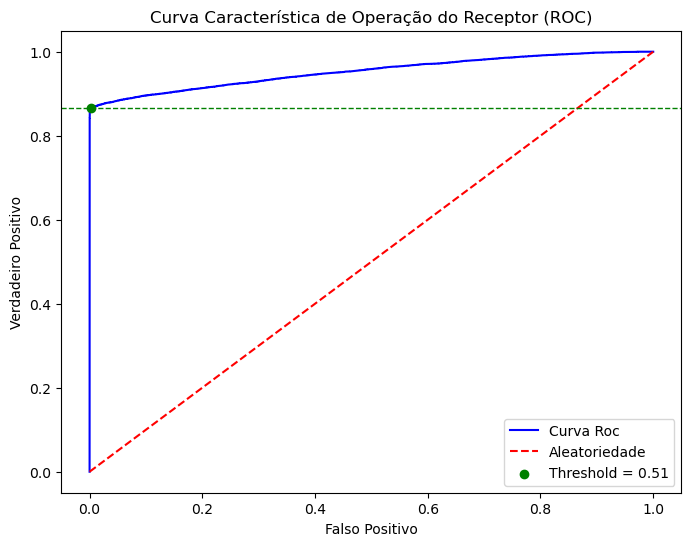

In [53]:
# índice do limiar que maximiza a sensibilidade (TPR)
idx = np.argmax(tpr - fpr)

# Plot a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Curva Roc')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Aleatoriedade')
plt.scatter(fpr[idx], tpr[idx], color='green', label=f'Threshold = {thresholds[idx]:.2f}', zorder=5)  # Adiciona um ponto para o limiar selecionado
plt.axhline(y=tpr[idx], color='green', linestyle='--', linewidth=1)  # Adiciona uma linha horizontal no limiar selecionado
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva Característica de Operação do Receptor (ROC)')
plt.legend()
plt.show()


              precision    recall  f1-score   support

           0       0.88      1.00      0.94     12180
           1       1.00      0.87      0.93     12146

    accuracy                           0.93     24326
   macro avg       0.94      0.93      0.93     24326
weighted avg       0.94      0.93      0.93     24326



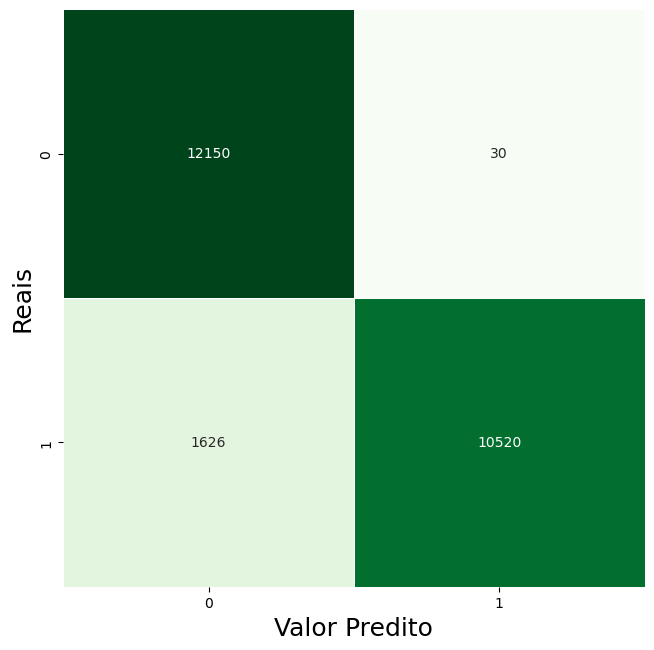

In [54]:
# Exibindo o relatório de classificação
print(classification_report(y_test, y_pred))

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Configurando a figura e os eixos para a matriz de confusão
fig, ax = plt.subplots(figsize=(7.5, 7.5))

# Criando o mapa de calor da matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False, linewidths=0.5, ax=ax)

# Definindo rótulos e título
plt.xlabel('Valor Predito', fontsize=18)
plt.ylabel('Reais', fontsize=18)

# Exibindo a figura
plt.show()

# Validação Cruzada (Cross-Validation): ALERTA!!!

A validação cruzada é uma técnica fundamental em machine learning e estatística para avaliar a capacidade de generalização de um modelo preditivo. Ela consiste em dividir o conjunto de dados em partes menores, chamadas de "folds", onde o modelo é treinado em algumas partes e testado em outras. Esse processo é repetido várias vezes, de modo que cada parte do conjunto de dados seja usada tanto para treinamento quanto para teste.

A importância da validação cruzada reside em sua capacidade de fornecer uma estimativa mais precisa do desempenho do modelo, especialmente em situações onde o conjunto de dados é pequeno ou desbalanceado. Ao utilizar múltiplas partições dos dados para treinamento e teste, a validação cruzada ajuda a evitar problemas de overfitting, garantindo que o modelo seja avaliado de maneira mais robusta.

No entanto, é importante notar que a validação cruzada pode consumir recursos computacionais significativos, especialmente quando aplicada em conjuntos de dados grandes ou quando o modelo é complexo. Isso se deve ao fato de que o modelo precisa ser treinado repetidamente em diferentes partições dos dados. Portanto, ao escolher entre diferentes métodos de validação cruzada, como k-fold cross-validation, leave-one-out cross-validation, entre outros, é necessário considerar o equilíbrio entre a precisão da avaliação do modelo e os recursos computacionais disponíveis.

In [55]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

In [56]:
# Exibir os resultados da validação cruzada
print("Acurácia Média:", scores.mean())
print("Desvio Padrão:", scores.std())

Acurácia Média: 0.8646021356134403
Desvio Padrão: 0.013708914095327498


In [57]:
bad_payers_count = df_origin[df_origin['alvo'] == 0]['col_4'].shape[0]
df_origin[df_origin['alvo'] == 0]['col_4'].sum()

231441027.87

# Análise de Negócio e Conclusão

**Introdução**

Embora a análise de negócio seja opcional para a vaga de Cientista de Dados 1, gostaria de aplicar algumas ideias para demonstrar como o meu modelo pode ser relevante para as empresas.

**Desempenho do Modelo**

As métricas de avaliação obtidas no último teste antes de subir via Google Drive foram:

- Acurácia: 93%
- Precisão para Bom Pagador (classe 1): 100%
- Recall para Bom Pagador (classe 1): 87%
- F1-Score para Bom Pagador (classe 1): 93%

**Utilidade do Modelo no Dia a Dia da Empresa**

A aplicação do meu modelo pode trazer diversos benefícios práticos para a empresa, incluindo:

- **Melhoria na Gestão de Risco de Crédito:** Com uma acurácia de 93%, o modelo pode identificar com alta confiabilidade os bons pagadores, ajudando a empresa a tomar decisões mais informadas sobre a concessão de crédito e a otimizar suas políticas de gerenciamento de risco.

- **Otimização dos Recursos de Cobrança:** O recall de 87% para bons pagadores garante que a empresa identifique a maioria dos clientes confiáveis. Isso permite direcionar os esforços de cobrança com mais eficácia, priorizando os casos com maior risco de inadimplência.

- **Aumento da Lucratividade:** Ao reduzir as perdas associadas a maus pagadores, a empresa pode melhorar sua margem de lucro. Além disso, a precisão de 100% para a classe 1 minimiza o risco de recusar crédito a bons pagadores, mantendo a base de clientes satisfeitos e fiéis.

- **Tomada de Decisão Baseada em Dados:** As métricas de avaliação fornecem uma base sólida para decisões estratégicas, apoiando a equipe de gestão na definição de políticas de crédito mais eficazes e ajustadas ao perfil de risco real dos clientes.

- **Automatização e Eficiência Operacional:** A implementação do modelo pode automatizar a avaliação de risco de crédito, reduzindo o tempo e o custo associados à análise manual. Isso aumenta a eficiência operacional e libera recursos para outras atividades estratégicas.

Em resumo, o modelo não só melhora a precisão na identificação de bons pagadores, mas também contribui para uma gestão de crédito mais eficiente e lucrativa, beneficiando diversos aspectos operacionais e estratégicos da empresa.


### Critérios utilizados para definição das classes de nível de Pagador:

1. **Remoção das colunas com alta correlação**:
   - Colunas com alta correlação foram removidas para evitar multicolinearidade e instabilidade nos coeficientes do modelo.
3. **Tratamento de vazios**: Criação de nova categoria para os valores nulos, os quantitativos usei a media e categoricos criei uma nova categoria: "INDIFIERENTE" 
2. **Remoção das colunas com baixíssima correlação inicialmente**:
   - Inicialmente, colunas com baixíssima correlação foram removidas, mas isso resultou em queda no desempenho do modelo. Indicando que até mesmo variáveis com baixa correlação podem conter informações relevantes.

3. **Remoção de colunas de data**:
   - Colunas de data foram removidas, considerando que o período de amostragem é de apenas cerca de 1 ano. Isso evita que o modelo aprenda padrões sazonais ou tendências temporais irrelevantes para a classificação de Bom Pagador.